In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

input_path = Path("../data/af2_results/")
input_path.exists()

True

In [14]:
from benchmark import get_cath
from pathlib import Path

#change this
PATH_TO_PDB=Path('../pdb/')

#change this - not a problem if missing, should download a new one by default
cath_location = "cath-domain-description-file.txt"

cath_df = get_cath.read_data(cath_location)
new_df=get_cath.filter_with_user_list(cath_df, "../set.txt")
new_df

,PDB,chain,class,architecture,topology,hsf,start,stop
63148,1h32,A,1,10,760,10,1,54
71296,1dvo,A,1,10,1710,10,33,184
86819,1a41,A,1,20,120,380,217,310
112599,1gxm,A,1,50,10,20,326,649
113522,1bx7,A,2,10,22,10,3,53
117289,1lpb,A,2,10,80,10,6,90
117639,1b8k,A,2,10,90,10,11,112
120622,1lsl,A,2,20,100,10,472,528
121419,1g3p,A,2,30,27,10,1,101
127146,1igq,A,2,30,30,150,305,358


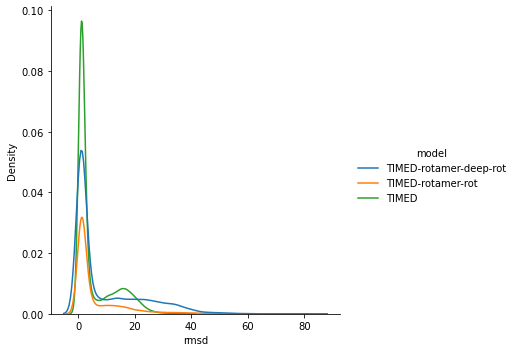

In [2]:
results_arr = []
columns = [
    "model",
    "pdb",
    "n",
    "temperature",
    "accuracy",
    "rmsd",
    "gdt",
]
for curr_model in [
    "TIMED-rotamer-deep-rot",
    "TIMED-rotamer-rot",
    "TIMED",
]:
    curr_model_path = input_path / f"all_results_{curr_model}.csv"
    assert curr_model_path.exists(), f"Input file {curr_model_path} does not exist"
    # Load results in pandas:
    df = pd.read_csv(curr_model_path, header=None)
    df.dropna(inplace=True)
    results_arr += df.values.tolist()
# Merge all together:
results_arr = pd.DataFrame(results_arr, columns=columns)
sns.displot(results_arr, x="rmsd", hue="model", kind="kde")

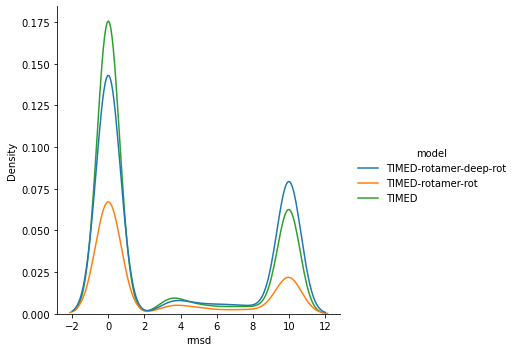

In [6]:
results_arr.loc[results_arr['rmsd'] < 3, 'rmsd'] = 0
results_arr.loc[results_arr['rmsd'] > 10, 'rmsd'] = 10
sns.displot(results_arr, x="rmsd", hue="model", kind="kde")

In [11]:
np.savetxt("../set.txt", np.unique(results_arr['pdb'].to_numpy()), fmt='%s')

In [ ]:
def download_data(out_dir: Path) -> None:
    """Download CATH file.
    
    Parameters
    ----------
    out_dir: Path:
        Directory where to store the file."""
    if click.confirm(
            f"CATH file does not exist. It will be downloaded to {out_dir.resolve()}. Continue? "
        ):
         wget.download('ftp://orengoftp.biochem.ucl.ac.uk/cath/releases/latest-release/cath-classification-data/cath-domain-description-file.txt', out=str(out_dir))
    else:
        exit()

def read_data(CATH_file: str) -> pd.DataFrame:
    """If CATH .csv exists, loads the DataFrame. If CATH .txt exists, makes DataFrame and saves it. If CATH .txt file doesn't exist, downloads it.
    Parameters
    ----------
    CATH_file: str
        CATH .txt file name.
    Returns
    -------
    df:pd.DataFrame
        DataFrame containing CATH and PDB codes."""
    path = Path(CATH_file)
    #download if doesn't exist.
    if not path.exists():
        download_data(path.parent)
    # load .csv if exists, faster than reading .txt
    if path.with_suffix(".csv").exists():
        df = pd.read_csv(path.with_suffix(".csv"), index_col=0)
        # start, stop needs to be str
        df["start"] = df["start"].apply(str)
        df["stop"] = df["stop"].apply(str)
        return df

    else:
        cath_info = []
        temp = []
        start_stop = []
        with open(path) as file:
            for line in file:
                if line[:6] == "DOMAIN":
                    # PDB
                    temp.append(line[10:14])
                    # chain
                    temp.append(line[14])
                if line[:6] == "CATHCO":
                    # class, architecture, topology, homologous superfamily
                    cath = [int(i) for i in line[10:].strip("\n").split(".")]
                    temp = temp + cath
                if line[:6] == "SRANGE":
                    j = line.split()
                    # start and stop resi, can be multiple for the same chain
                    # must be str to deal with insertions (1A,1B) later.
                    start_stop.append([str(j[1][6:]), str(j[2][5:])])
                if line[:2] == "//":
                    # keep fragments from the same chain as separate entries
                    for fragment in start_stop:
                        cath_info.append(temp + fragment)
                    start_stop = []
                    temp = []
        df = pd.DataFrame(
            cath_info,
            columns=[
                "PDB",
                "chain",
                "class",
                "architecture",
                "topology",
                "hsf",
                "start",
                "stop",
            ],
        )
        df.to_csv(path.with_suffix(".csv"))
        return df